# Astrononmy 19 Final Project

Group members: Sabi Abraham, April Ewers, Aditya Singh, Jaden Patrick Tanyao

Repository link: https://github.com/TechnoPangolin/ASTR-19-2-FINAL 
Submission document: https://docs.google.com/document/d/1SqOGh9XX9saNt5fEedSLPfw6TFOLC9DE/edit?usp=sharing&ouid=116023239842182664539&rtpof=true&sd=true

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [ ]:
#open the file containing the data
fname = ("./55 Cnc RVC 274.txt")
f = open(fname, 'r')

#read the data and split it into lines
raw = f.read()
rawsplit = raw.split("\n")

#initialize an empty array of correct dimensions to hold the data
dataRVC = np.empty(shape=(3, 274), dtype='float')
#intialize counters
x = 0
y = 0

#read data into usable floats by taking apart each line and extracting the numbers
for a in rawsplit:
    #ignore the metadata and table header lines
    if a[0] != "\\" and a[0] != "|":
        #split apart the line on spaces
        b = a.split(" ")
        for c in b:
            #ignore all the lines containing only spaces or null
            if c != " " and c != "":
                #cast to float and assign the data to the correct array position  
                dataRVC[y, x] = float(c)
                #step the counter for this line
                y += 1
        #step the overall counter
        x += 1
        #reset the line counter
        y = 0

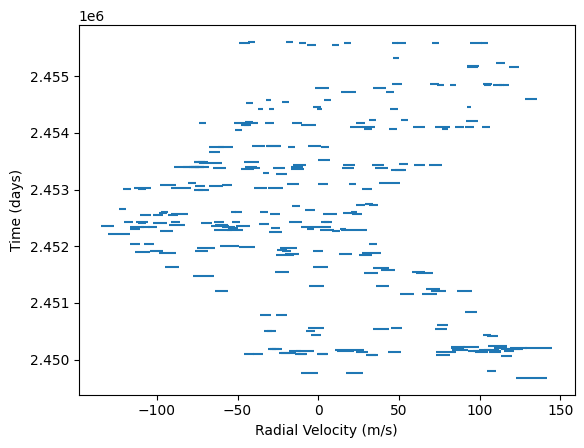

In [53]:
#create figure and axes to plot to
fig, ax = plt.subplots()

#plot the data with error bars and no connecting lines for better clarity
ax.errorbar(dataRVC[1], dataRVC[0], xerr=2*dataRVC[2], fmt='none')

#label the axes
ax.set_ylabel("Time (days)")
ax.set_xlabel("Radial Velocity (m/s)")

#save the plot as required
plt.savefig("FinalFig_2_1.pdf", bbox_inches='tight', dpi=300, format='pdf')